# Assignment 6

# Collaboration by Minghao Li, Dongke Wang

In [1]:
pip install --upgrade NEMtropy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist

In [3]:
g1 = nx.read_graphml('WDN_1992.txt.graphml')
g2 = nx.read_graphml('WDN_1993.txt.graphml')
g3 = nx.read_graphml('WDN_1994.txt.graphml')
g4 = nx.read_graphml('WDN_1995.txt.graphml')
g5 = nx.read_graphml('WDN_1996.txt.graphml')
g6 = nx.read_graphml('WDN_1997.txt.graphml')
g7 = nx.read_graphml('WDN_1998.txt.graphml')
g8 = nx.read_graphml('WDN_1999.txt.graphml')
g9 = nx.read_graphml('WDN_2000.txt.graphml')
g10 = nx.read_graphml('WDN_2001.txt.graphml')
g11 = nx.read_graphml('WDN_2002.txt.graphml')

# A06.1 - Exponential Random Graph Models

In [4]:
def coes(g):
    ac = nx.average_clustering(g)
    re = nx.reciprocity(g)
    return ac,re

In [5]:
glist = [g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11]

In [6]:
i = 1
for g in glist:
    ac = nx.average_clustering(g)
    re = nx.reciprocity(g)
    print(f"g{i}'s clustering is {ac}, reciprocity is {re}")
    i = i+1

g1's clustering is 0.8021364732946835, reciprocity is 0.367340010185028
g2's clustering is 0.7826552252417198, reciprocity is 0.430931744312026
g3's clustering is 0.778118724128831, reciprocity is 0.541138903672166
g4's clustering is 0.769316598518603, reciprocity is 0.6043664931031333
g5's clustering is 0.779859983253989, reciprocity is 0.6482433229421182
g6's clustering is 0.7844618494148852, reciprocity is 0.6822429906542056
g7's clustering is 0.7913458153848136, reciprocity is 0.7015887290167866
g8's clustering is 0.7946922756897296, reciprocity is 0.716582186821144
g9's clustering is 0.7928732278480053, reciprocity is 0.7232351897836112
g10's clustering is 0.8020845961993215, reciprocity is 0.7375525101577026
g11's clustering is 0.7955013137787762, reciprocity is 0.7041909280425562


# UBCM

In [7]:
meanlist=[]
stdlist=[]
clulist=[]

In [8]:
def fit_UB(g):
    g.to_undirected()
    adj_kar = nx.to_numpy_array(g)
    graph = UndirectedGraph(adj_kar)
    graph.solve_tool(model="cm_exp")
    graph.ensemble_sampler(30, cpu_n=1, output_dir="sample/")
    clust_orig = nx.average_clustering(g)
    summ = 0
    s = 0
    clust = []
    for i in range(30):
        edgelist_ens = np.loadtxt(f"sample/{i}.txt")
        net = nx.Graph()
        net.add_edges_from(edgelist_ens)
        clust.append(nx.average_clustering(net))
    for j in clust:        
        summ += j 
        average = summ/30
    for k in clust:     
        s += (k-average)**2
        SE = (s/30)**0.5
    meanlist.append(average)
    stdlist.append(SE)
    clulist.append(clust_orig)
    print(f"original clustering = {clust_orig}")
    print(f"average = {average}")
    print(f"standard error = {SE}")
    plt.hist(clust)
    plt.title("clustering distribution")



/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/NEMtropy/models_functions.py:461: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/NEMtropy/models_functions.py:462: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",



solution error = 7.587452444113296e-09
original clustering = 0.8021364732946835
average = 0.28850231987955943
standard error = 0.007351256773919315


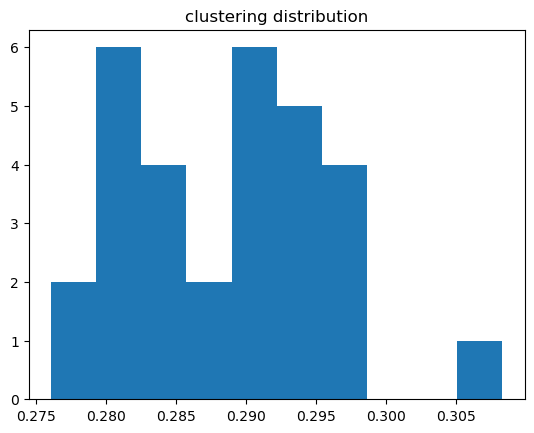

In [9]:
fit_UB(g1)


solution error = 5.276621095617884e-08


/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


original clustering = 0.7826552252417198
average = 0.35484244221372696
standard error = 0.005244754832679227


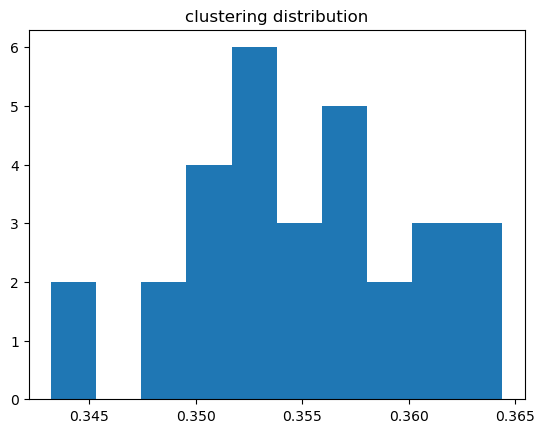

In [10]:
fit_UB(g2)


solution error = 1.1346813266754907e-07
original clustering = 0.778118724128831
average = 0.4595498046186266
standard error = 0.005503677383036461


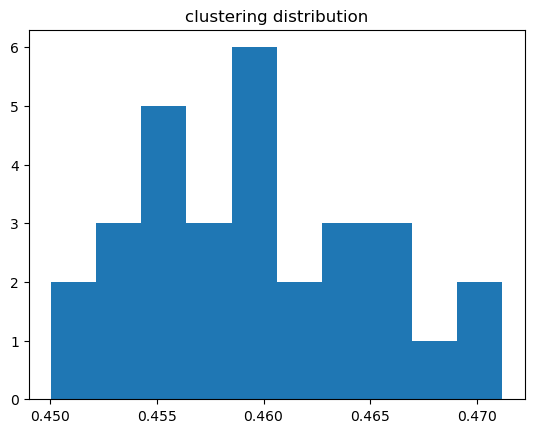

In [11]:
fit_UB(g3)


solution error = 2.9461858730428503e-08
original clustering = 0.769316598518603
average = 0.5317713343824327
standard error = 0.005677359108007945


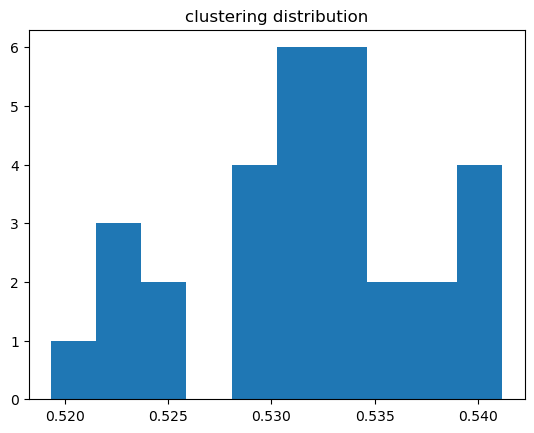

In [12]:
fit_UB(g4)


solution error = 1.5382499896077206e-07
original clustering = 0.779859983253989
average = 0.5729037585398636
standard error = 0.005979173736831019


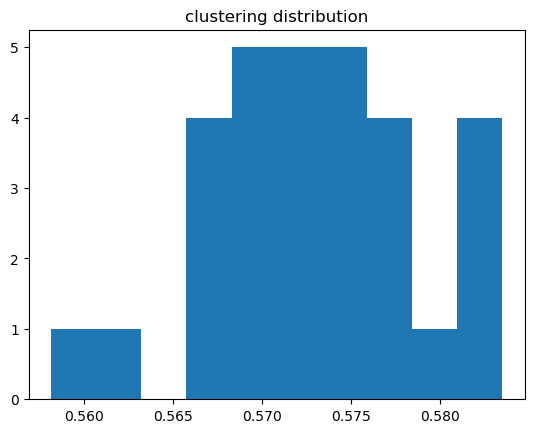

In [13]:
fit_UB(g5)


solution error = 1.7405027108452487e-07
original clustering = 0.7844618494148852
average = 0.6127800116706549
standard error = 0.0059882922171952055


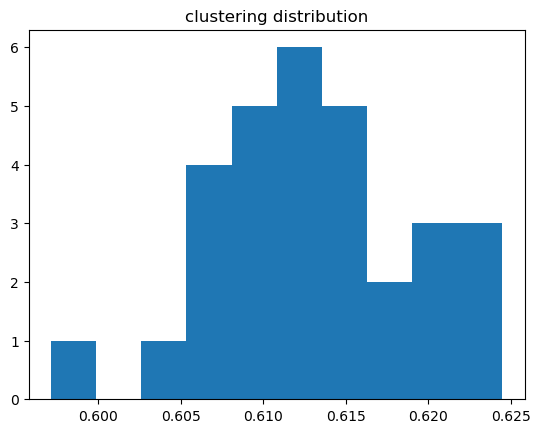

In [14]:
fit_UB(g6)


solution error = 6.022268053129665e-07
original clustering = 0.7913458153848136
average = 0.638330329443214
standard error = 0.00589367638333816


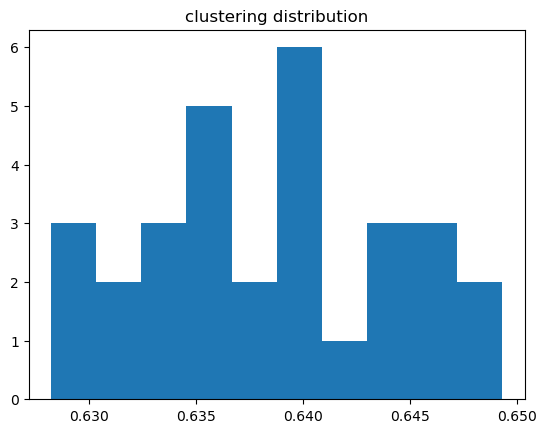

In [15]:
fit_UB(g7)


solution error = 5.764093202742515e-09
original clustering = 0.7946922756897296
average = 0.6647176064443012
standard error = 0.005329077193566841


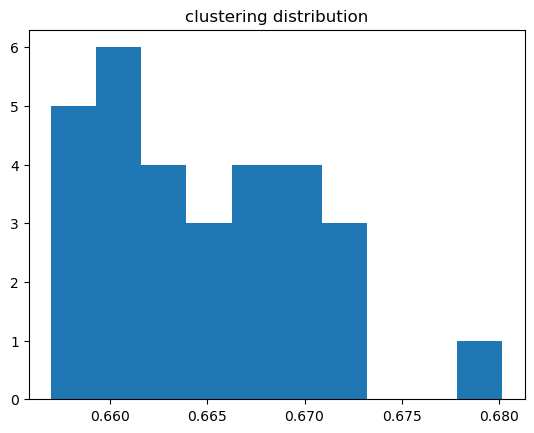

In [16]:
fit_UB(g8)


solution error = 3.975671347689058e-08
original clustering = 0.7928732278480053
average = 0.6672980458335667
standard error = 0.003966519941470145


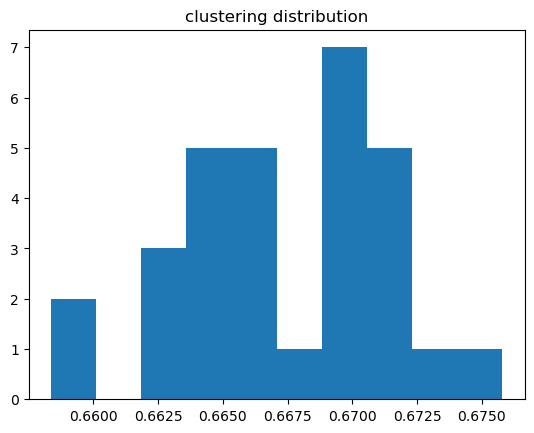

In [17]:
fit_UB(g9)


solution error = 5.903652322558628e-08
original clustering = 0.8020845961993215
average = 0.6833566339228054
standard error = 0.00405667324674261


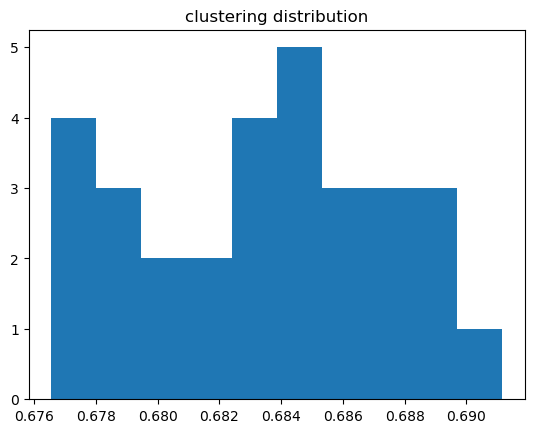

In [18]:
fit_UB(g10)


solution error = 1.8182423389134783e-07
original clustering = 0.7955013137787762
average = 0.6495253474348192
standard error = 0.0045883739405390015


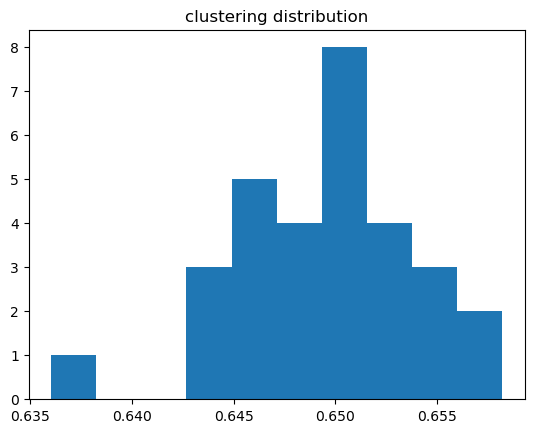

In [19]:
fit_UB(g11)

In [20]:
x = [1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002]
stdlist2 = []
for i in stdlist:
    stdlist2.append(i*2)

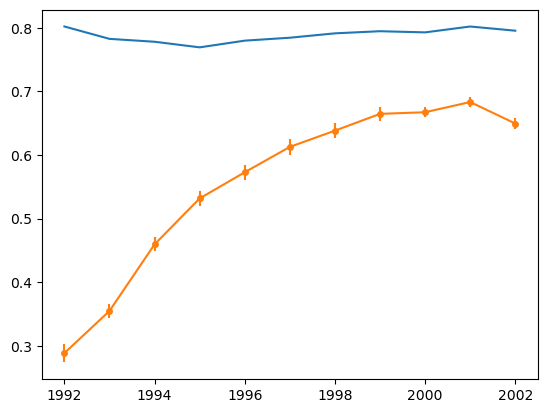

In [21]:
fig,ax = plt.subplots()
ax.plot(x,clulist)
ax.errorbar(x, meanlist, yerr=stdlist2, fmt='-o', markersize = 4 )
plt.show()

# DBCM

In [22]:
Dmeanlist=[]
Dstdlist=[]
Dclulist=[]
Dreclist=[]
Dstdlistr=[]
Dmeanlistr=[]

In [23]:
def fit_DB(g):
    adj_kar = nx.to_numpy_array(g)
    graph = DirectedGraph(adj_kar)
    graph.solve_tool(model="dcm_exp")
    graph.ensemble_sampler(30, cpu_n=1, output_dir="sample/")
    clust = []
    recip = []
    sumc = 0
    sumr = 0
    sc = 0
    sr = 0
    ac = nx.average_clustering(g)
    re = nx.reciprocity(g)
    for i in range(30):
        edgelist_ens = np.loadtxt(f"sample/{i}.txt")
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                        is_directed = True,
                                        is_sparse = False,
                                        is_weighted = False)
        G = nx.DiGraph()
        G.add_edges_from(edgelist_ens.astype(int))
        clust.append(nx.average_clustering(G))
        recip.append(nx.reciprocity(G))
    for j in clust:   
        sumc += j
        CME = sumc/30
    for k in clust:        
        sc += (k-CME)**2
        CSE = (sc/30)**0.5
    for l in recip:        
        sumr += l
        RME = sumr/30
    for m in recip:
        sr += (m-RME)**2
        RSE = (sr/30)**0.5
    Dmeanlist.append(CME)
    Dstdlist.append(CSE)
    Dclulist.append(ac)
    Dreclist.append(re)
    Dstdlistr.append(RSE)
    Dmeanlistr.append(RME)
    print(f"original clustering = {ac}")
    print(f"original reciprocity = {re}")
    print(f"clustering average = {CME}")
    print(f"clustering standard error = {CSE}")
    print(f"reciprocity average = {RME}")
    print(f"reciprocity standard error = {RSE}")
    
    plt.subplot(1, 2, 1)
    plt.title("clustering distribution")
    plt.hist(clust)
    
    plt.subplot(1, 2, 2)
    plt.title("reciprocity distribution")
    plt.hist(recip)
    plt.show()

/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/NEMtropy/models_functions.py:3181: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/NEMtropy/models_functions.py:3182: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",



solution error = 1.3780621088699263e-09
original clustering = 0.8021364732946835
original reciprocity = 0.367340010185028
clustering average = 0.8001437456610568
clustering standard error = 0.00292327577286129
reciprocity average = 0.36343403652573336
reciprocity standard error = 0.0034249123698544175


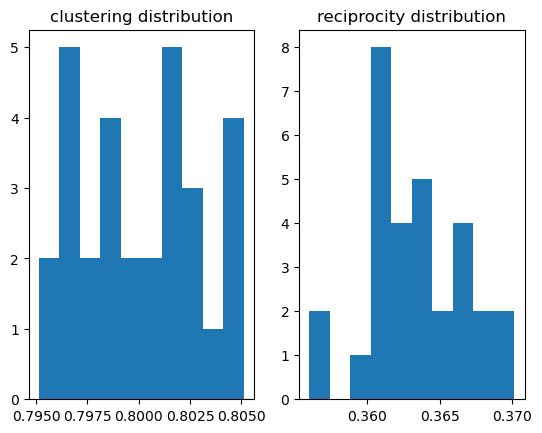

In [24]:
fit_DB(g1)


solution error = 4.920632790117452e-09


/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


original clustering = 0.7826552252417198
original reciprocity = 0.430931744312026
clustering average = 0.7790632961162485
clustering standard error = 0.002648274417567374
reciprocity average = 0.42623569118420873
reciprocity standard error = 0.0030318668735776163


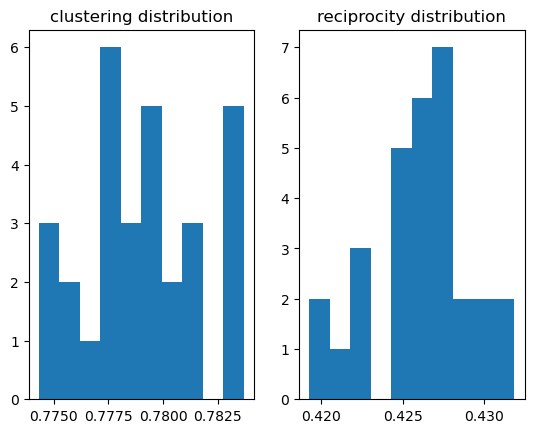

In [25]:
fit_DB(g2)


solution error = 3.4150140493238723e-09
original clustering = 0.778118724128831
original reciprocity = 0.541138903672166
clustering average = 0.7752647072861059
clustering standard error = 0.002143254871578481
reciprocity average = 0.5296025137921926
reciprocity standard error = 0.0031254558220262033


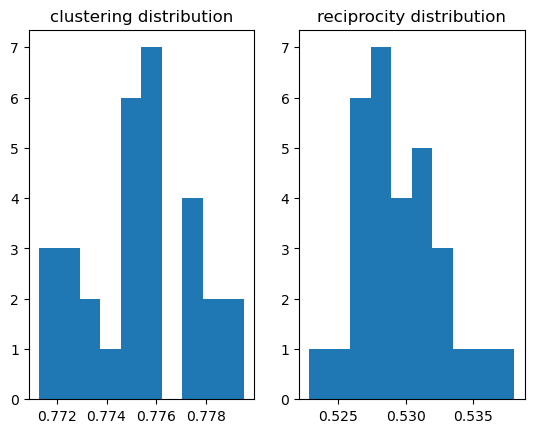

In [26]:
fit_DB(g3)


solution error = 3.5693688005267177e-09
original clustering = 0.769316598518603
original reciprocity = 0.6043664931031333
clustering average = 0.7671557207709366
clustering standard error = 0.002433188315620155
reciprocity average = 0.5862172554737944
reciprocity standard error = 0.003912279774686179


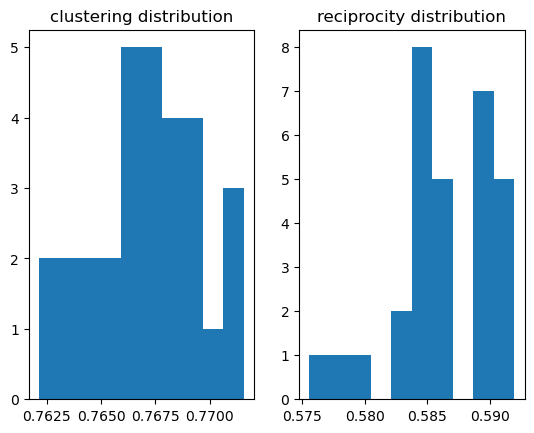

In [27]:
fit_DB(g4)


solution error = 1.6178631767616025e-09
original clustering = 0.779859983253989
original reciprocity = 0.6482433229421182
clustering average = 0.7776962954989133
clustering standard error = 0.001956296973353665
reciprocity average = 0.6259280966048062
reciprocity standard error = 0.0020258336676388634


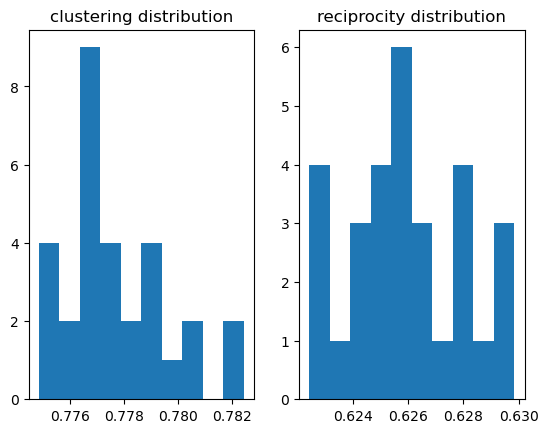

In [28]:
fit_DB(g5)


solution error = 3.2280240702675655e-09
original clustering = 0.7844618494148852
original reciprocity = 0.6822429906542056
clustering average = 0.7818485413233788
clustering standard error = 0.0021866111202022546
reciprocity average = 0.6582955392072096
reciprocity standard error = 0.0029669774111642077


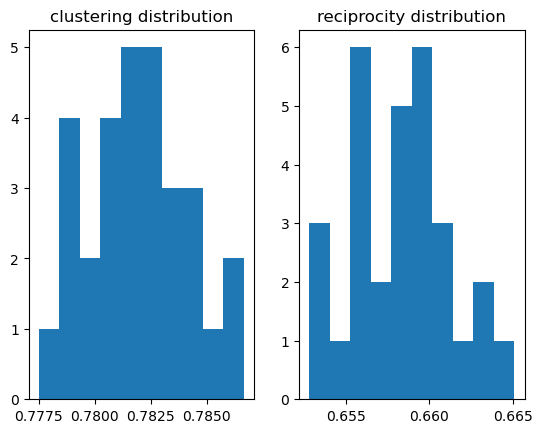

In [29]:
fit_DB(g6)


solution error = 3.2129605642694514e-09
original clustering = 0.7913458153848136
original reciprocity = 0.7015887290167866
clustering average = 0.7903832442441615
clustering standard error = 0.0017227638035645456
reciprocity average = 0.6786835530757572
reciprocity standard error = 0.002485381712895536


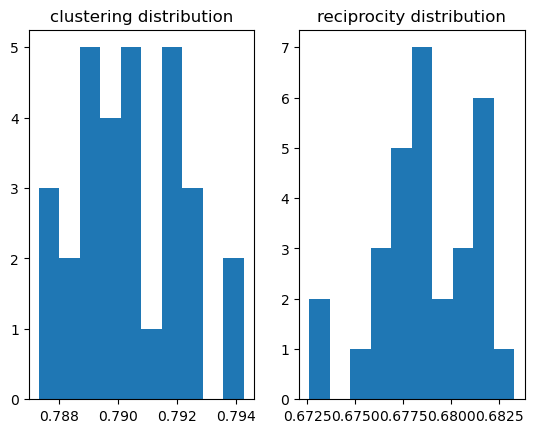

In [30]:
fit_DB(g7)


solution error = 1.7623733583604917e-09
original clustering = 0.7946922756897296
original reciprocity = 0.716582186821144
clustering average = 0.7917440726293914
clustering standard error = 0.00181064441448133
reciprocity average = 0.6939927072514346
reciprocity standard error = 0.0025239339750025612


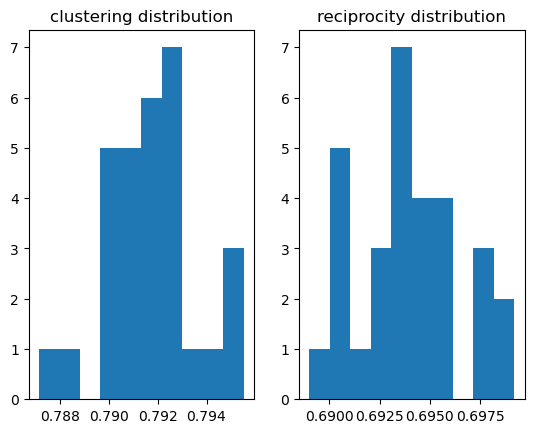

In [31]:
fit_DB(g8)


solution error = 3.3707969748775213e-09
original clustering = 0.7928732278480053
original reciprocity = 0.7232351897836112
clustering average = 0.7897193319637801
clustering standard error = 0.001399506679018767
reciprocity average = 0.6966358184000024
reciprocity standard error = 0.001965646824902665


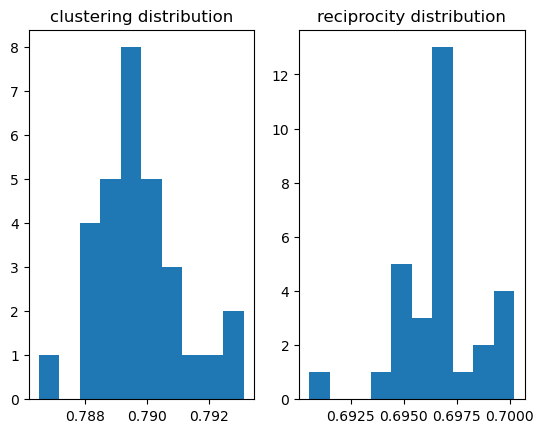

In [32]:
fit_DB(g9)


solution error = 3.1056686111696763e-09
original clustering = 0.8020845961993215
original reciprocity = 0.7375525101577026
clustering average = 0.8010910806331719
clustering standard error = 0.0017682771071458336
reciprocity average = 0.7169697320221652
reciprocity standard error = 0.0025087393042997667


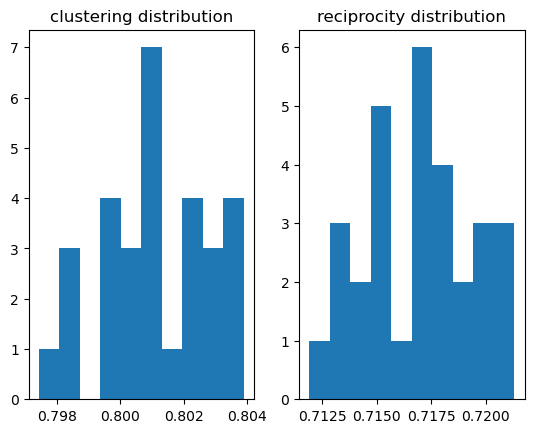

In [33]:
fit_DB(g10)


solution error = 2.942798005278746e-09
original clustering = 0.7955013137787762
original reciprocity = 0.7041909280425562
clustering average = 0.7934288597956591
clustering standard error = 0.002016559673931661
reciprocity average = 0.6855623739887798
reciprocity standard error = 0.002637827078059959


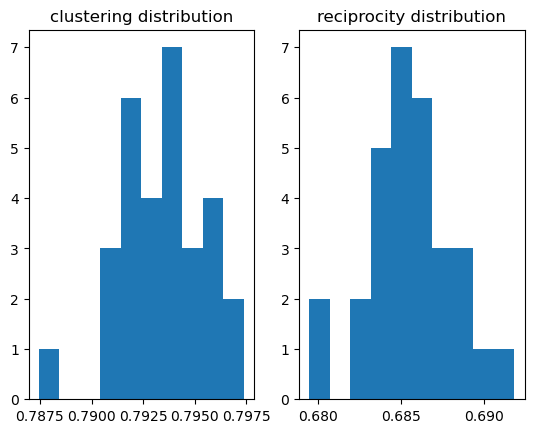

In [34]:
fit_DB(g11)

In [35]:
Dstdlist2 = []
for i in Dstdlist:
    Dstdlist2.append(i*2)

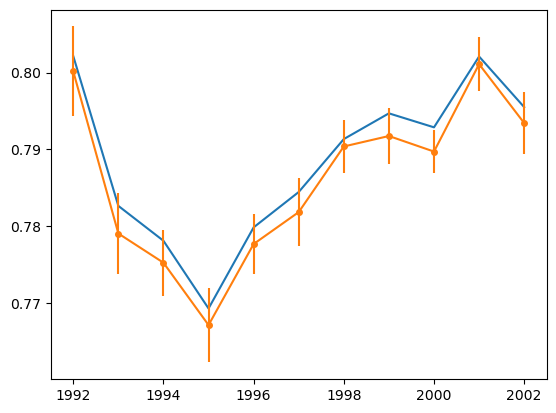

In [36]:
fig,ax = plt.subplots()
ax.plot(x,Dclulist)
ax.errorbar(x, Dmeanlist, yerr=Dstdlist2, fmt='-o', markersize = 4)
plt.show()

In [37]:
Dstdlistr2 = []
for i in Dstdlistr:
    Dstdlistr2.append(i*2)

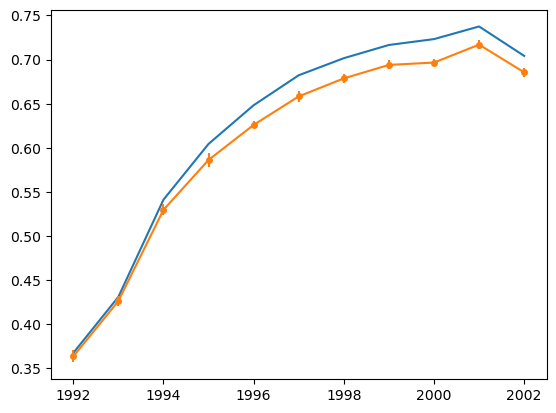

In [38]:
fig,ax = plt.subplots()
ax.plot(x,Dreclist)
ax.errorbar(x, Dmeanlistr, yerr=Dstdlistr2, fmt='-o', markersize = 4)
plt.show()

# A06.2 - Weighted ERGMs

In [6]:
i = 1
for g in glist:
    asso = nx.degree_assortativity_coefficient(g)
    print(f"g{i}'s strength assortativity coefficient is {asso}")
    i = i+1

g1's strength assortativity coefficient is -0.2551375256202346
g2's strength assortativity coefficient is -0.28628809770093255
g3's strength assortativity coefficient is -0.29591703390328217
g4's strength assortativity coefficient is -0.2708699568081426
g5's strength assortativity coefficient is -0.2644865496772723
g6's strength assortativity coefficient is -0.2630850071339807
g7's strength assortativity coefficient is -0.2509647051375973
g8's strength assortativity coefficient is -0.26167551933665184
g9's strength assortativity coefficient is -0.2537128623452365
g10's strength assortativity coefficient is -0.2493150327856727
g11's strength assortativity coefficient is -0.2530429409507524


# UECM

In [6]:
from NEMtropy import matrix_generator
meanlistUE = []
stdlistUE = []
assolistUE = []
adj_weigh = matrix_generator.random_weighted_matrix_generator_uniform_custom_density(n=30,
                                                                                     p=0.2,
                                                                                     sym=True,
                                                                                     sup_ext=30,
                                                                                     intweights=True)

In [8]:
def fit_UE(g):
    summ= 0
    s = 0
    assort = []
    g.to_undirected()
    assort_orig = nx.degree_assortativity_coefficient(g)
    
    
    graph = UndirectedGraph(adj_weigh)
    
    graph.solve_tool(model="crema",
                 method="newton",
                 initial_guess="random",
                 adjacency="cm_exp",
                 method_adjacency="newton",
                     max_steps=1000)
    graph.ensemble_sampler(30, cpu_n=1, output_dir='sample/')
    for i in range(30):
        edgelist_ens = np.loadtxt(f"sample/{i}.txt")
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                            is_directed = False,
                                            is_sparse = False,
                                            is_weighted = True)

        G = nx.from_numpy_array(ens_adj)
        assort.append(nx.degree_assortativity_coefficient(G))
        
    for j in assort:   
        summ += j
        ME = summ/30
        
    for k in assort:      
        s += (k-ME)**2
        SE = (s/30)**0.5
        
    print(f"original assortativity = {assort_orig}")
    print(f"average = {ME}")
    print(f"standard error = {SE}")
    meanlistUE.append(ME)
    stdlistUE.append(SE)
    assolistUE.append(assort_orig)
    plt.hist(assort)
    plt.title("assortativity distribution")
    

/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/NEMtropy/models_functions.py:461: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/NEMtropy/models_functions.py:462: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: Fir


solution error = 1.0716922460574096e-08
original assortativity = -0.2551375256202346
average = -0.11083102459324475
standard error = 0.08141687292705961


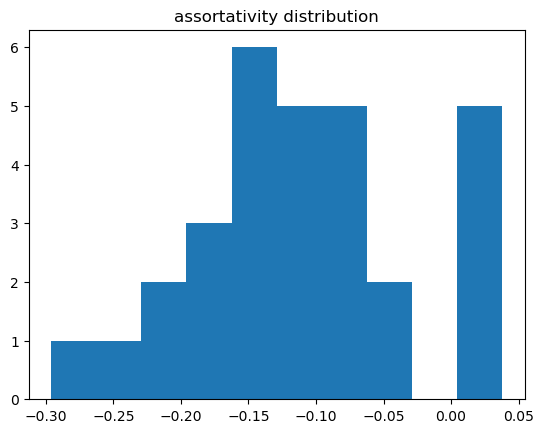

In [9]:
fit_UE(g1)


solution error = 3.8247498501675636e-08


/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


original assortativity = -0.28628809770093255
average = -0.09368853245077038
standard error = 0.08376349559414611


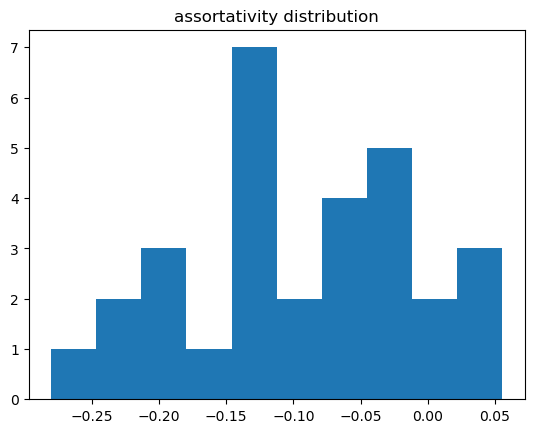

In [10]:
fit_UE(g2)


solution error = 7.716156602555202e-08
original assortativity = -0.29591703390328217
average = -0.11240105960856679
standard error = 0.08564020432525468


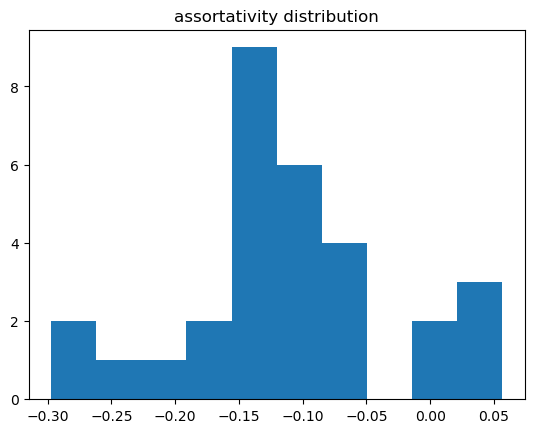

In [11]:
fit_UE(g3)


solution error = 4.859257618505808e-08
original assortativity = -0.2708699568081426
average = -0.11224475809536788
standard error = 0.0819409469726639


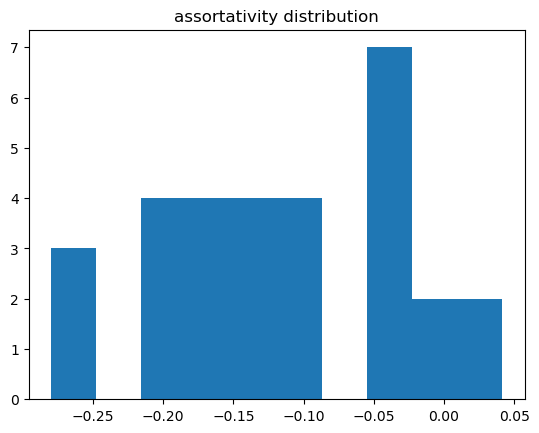

In [12]:
fit_UE(g4)


solution error = 1.3860931957765388e-07
original assortativity = -0.2644865496772723
average = -0.13766858711738095
standard error = 0.1017675267116958


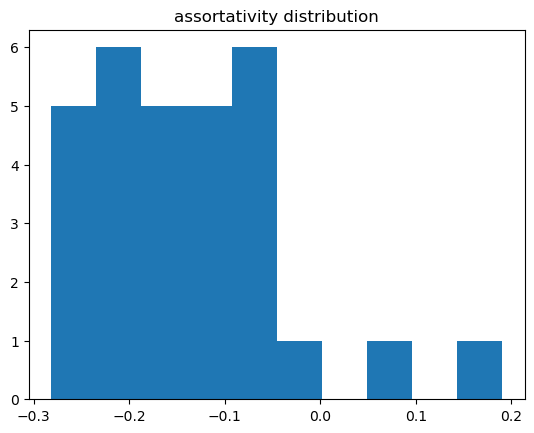

In [13]:
fit_UE(g5)


solution error = 5.867483121591022e-08
original assortativity = -0.2630850071339807
average = -0.12394247488776862
standard error = 0.07245151060587975


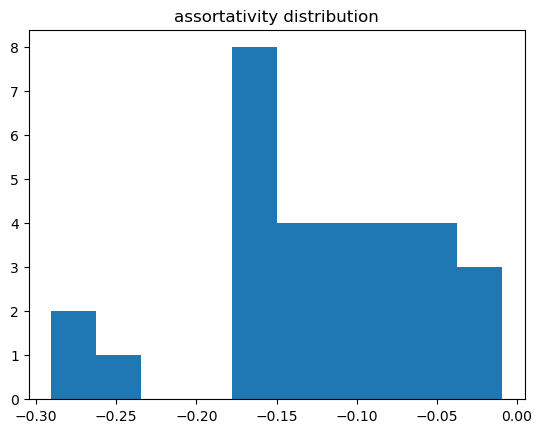

In [14]:
fit_UE(g6)


solution error = 2.0928190114233303e-07
original assortativity = -0.2509647051375973
average = -0.12179317732351322
standard error = 0.08835110696885828


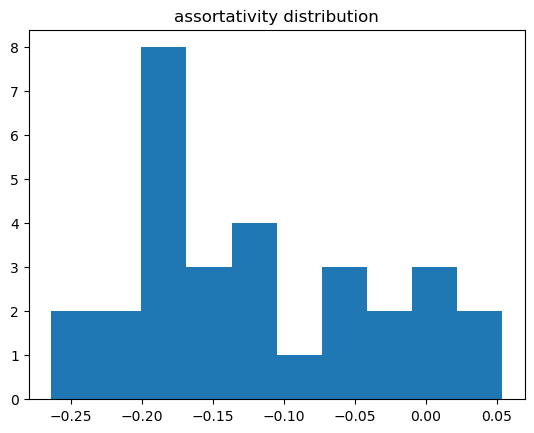

In [15]:
fit_UE(g7)


solution error = 3.3053808579097677e-06
original assortativity = -0.26167551933665184
average = -0.11925250921591782
standard error = 0.08341187457039183


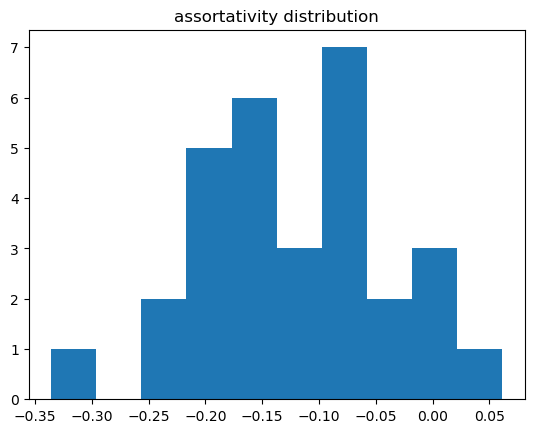

In [16]:
fit_UE(g8)


solution error = 3.1591650184736864e-08
original assortativity = -0.2537128623452365
average = -0.13677655632012697
standard error = 0.06697078382850696


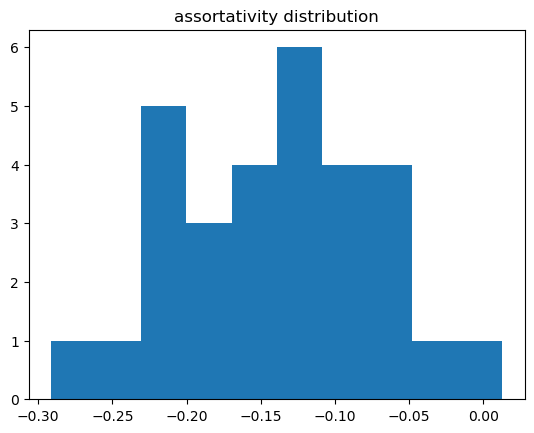

In [17]:
fit_UE(g9)


solution error = 6.480279068910022e-08
original assortativity = -0.2493150327856727
average = -0.1248258316101621
standard error = 0.07538460696103741


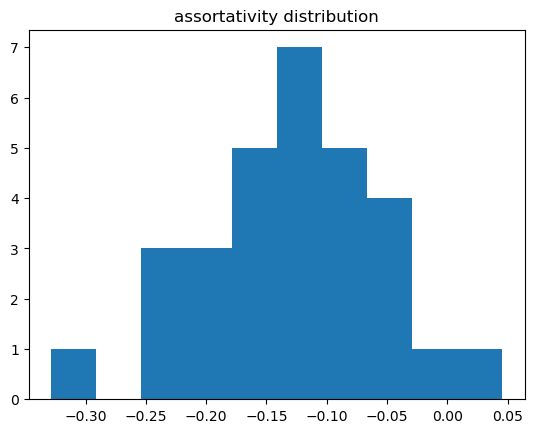

In [18]:
fit_UE(g10)


solution error = 8.435328435751899e-08
original assortativity = -0.2530429409507524
average = -0.12192555582415682
standard error = 0.07941838893489259


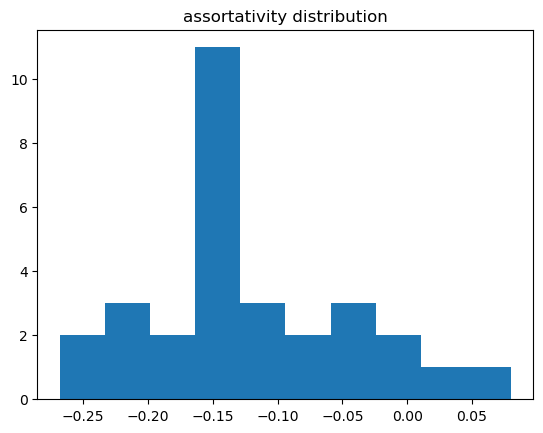

In [19]:
fit_UE(g11)

In [20]:
x = [1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002]
stdlistUE2 = []
for i in stdlistUE:
    stdlistUE2.append(i*2)

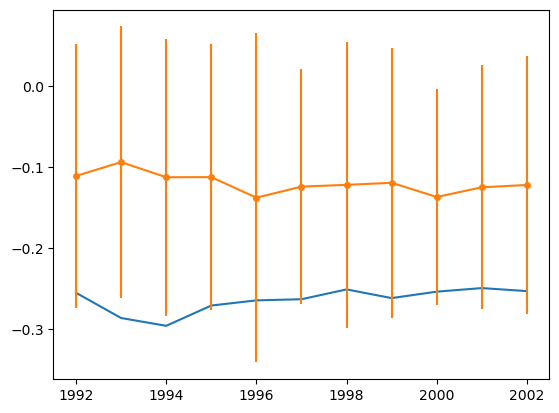

In [21]:
fig,ax = plt.subplots()
ax.plot(x,assolistUE)
ax.errorbar(x, meanlistUE, yerr=stdlistUE2, fmt='-o', markersize = 4)
plt.show()

# DECM

In [7]:
meanlistDEII = []
stdlistDEII = []
meanlistDEIO = []
stdlistDEIO = []
meanlistDEOO = []
stdlistDEOO = []
assolistDEinin = []
assolistDEinout = []
assolistDEoutout = []
assolistDE = []
adj_weigh = matrix_generator.random_weighted_matrix_generator_uniform_custom_density(n=30,
                                                                                     p=0.2,
                                                                                     sym=True,
                                                                                     sup_ext=30,
                                                                                     intweights=True)

In [8]:
def fit_DE(g):
    SmeanII = 0
    SstdII = 0
    SmeanIO = 0
    SstdIO = 0
    SmeanOO = 0
    SstdOO = 0
    assortII = []
    assortIO = []
    assortOO = []
    assort_orig_inin = nx.degree_assortativity_coefficient(g,x='in', y='in')
    assort_orig_inout = nx.degree_assortativity_coefficient(g,x='in', y='out')
    assort_orig_outout = nx.degree_assortativity_coefficient(g,x='out', y='out')
    
    graph = DirectedGraph(adj_weigh)
    
    graph.solve_tool(model="crema",
                 method="newton",
                 initial_guess="random",
                 adjacency="dcm_exp",
                 method_adjacency="newton",
                     max_steps=1000)
    graph.ensemble_sampler(30, cpu_n=1, output_dir='sample/')
    for i in range(30):
        edgelist_ens = np.loadtxt(f"sample/{i}.txt")
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                            is_directed = True,
                                            is_sparse = False,
                                            is_weighted = True)

        G = nx.from_numpy_array(ens_adj, create_using = nx.DiGraph)
        assortII.append(nx.degree_assortativity_coefficient(G, x='in', y='in', weight = "weight"))
        assortIO.append(nx.degree_assortativity_coefficient(G, x='in', y='out', weight = "weight"))
        assortOO.append(nx.degree_assortativity_coefficient(G, x='out', y='out', weight = "weight"))
        
    for j in assortII:   
        SmeanII += j
        MEII = SmeanII/30
        
    for k in assortII:      
        SstdII += (k-MEII)**2
        SEII = (SstdII/30)**0.5
        
    for j in assortIO:   
        SmeanIO += j
        MEIO = SmeanIO/30
        
    for k in assortIO:      
        SstdIO += (k-MEIO)**2
        SEIO = (SstdIO/30)**0.5
    
    for j in assortOO:   
        SmeanOO += j
        MEOO = SmeanOO/30
        
    for k in assortOO:      
        SstdOO += (k-MEOO)**2
        SEOO = (SstdOO/30)**0.5
        
    print(f"original strength assortativity(In-In) = {assort_orig_inin}")
    print(f"average assortativity(In-In)= {MEII}")
    print(f"standard error(In-In) = {SEII}")
    print(f"original strength assortativity(In-Out) = {assort_orig_inout}")
    print(f"average assortativity(In-Out)= {MEIO}")
    print(f"standard error(In-Out) = {SEIO}")
    print(f"original strength assortativity(Out-Out) = {assort_orig_outout}")
    print(f"average assortativity(Out-Out)= {MEOO}")
    print(f"standard error(Out-Out) = {SEOO}")
    meanlistDEII.append(MEII)
    stdlistDEII.append(SEII)
    meanlistDEIO.append(MEIO)
    stdlistDEIO.append(SEIO)
    meanlistDEOO.append(MEOO)
    stdlistDEOO.append(SEOO)
    assolistDEinin.append(assort_orig_inin)
    assolistDEinout.append(assort_orig_inout)
    assolistDEoutout.append(assort_orig_outout)
    
    plt.subplot(3, 1, 1)
    plt.hist(assortII)
    plt.title("assortativity distribution(in-in)")
    
    plt.subplot(3, 1, 2)
    plt.hist(assortIO)
    plt.title("assortativity distribution(in-out)")
    
    plt.subplot(3, 1, 3)
    plt.hist(assortOO)
    plt.title("assortativity distribution(out-out)")
    plt.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = None, hspace = 0.5)

/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/NEMtropy/models_functions.py:3181: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/NEMtropy/models_functions.py:3182: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: F


solution error = 6.683478659397224e-09
original strength assortativity(In-In) = -0.12870634376269993
average assortativity(In-In)= -0.0232456870617913
standard error(In-In) = 0.049200508867823164
original strength assortativity(In-Out) = -0.081463145797429
average assortativity(In-Out)= -0.019793478412938974
standard error(In-Out) = 0.05128720934103416
original strength assortativity(Out-Out) = -0.1432540758417944
average assortativity(Out-Out)= -0.03389629531981805
standard error(Out-Out) = 0.05192975918726713


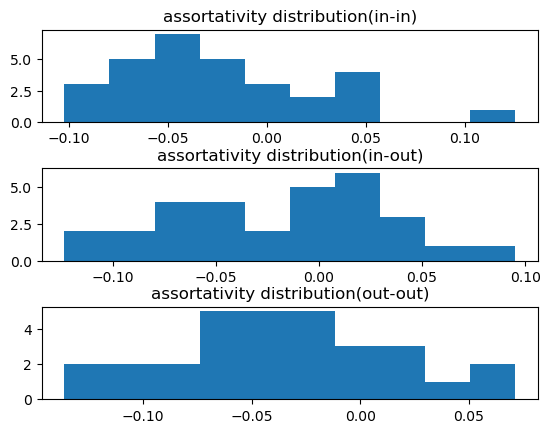

In [9]:
fit_DE(g1)


solution error = 7.302617177629145e-09


/Users/kirstenwang/opt/anaconda3/lib/python3.9/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


original strength assortativity(In-In) = -0.17867432161047195
average assortativity(In-In)= -0.03826500727759994
standard error(In-In) = 0.06861133763385983
original strength assortativity(In-Out) = -0.15242162080137178
average assortativity(In-Out)= -0.031627641821284344
standard error(In-Out) = 0.06576106008649768
original strength assortativity(Out-Out) = -0.22014091816681913
average assortativity(Out-Out)= -0.056325138139087565
standard error(Out-Out) = 0.07469930176763892


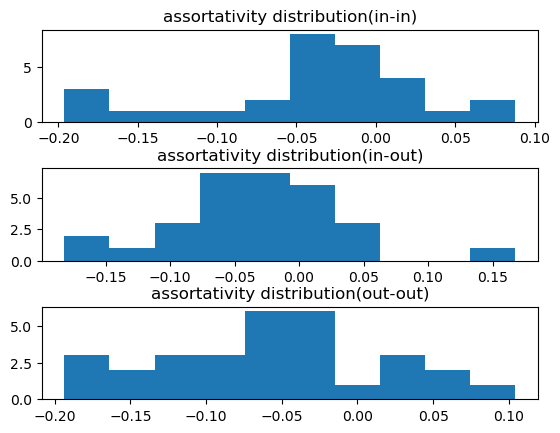

In [10]:
fit_DE(g2)


solution error = 2.3462121134798508e-11
original strength assortativity(In-In) = -0.2019758500772138
average assortativity(In-In)= -0.029005963076331236
standard error(In-In) = 0.0467139145355339
original strength assortativity(In-Out) = -0.1648160929704978
average assortativity(In-Out)= -0.007096939459298344
standard error(In-Out) = 0.09861284222607065
original strength assortativity(Out-Out) = -0.24003678996093758
average assortativity(Out-Out)= -0.02586635720735848
standard error(Out-Out) = 0.07398902158862615


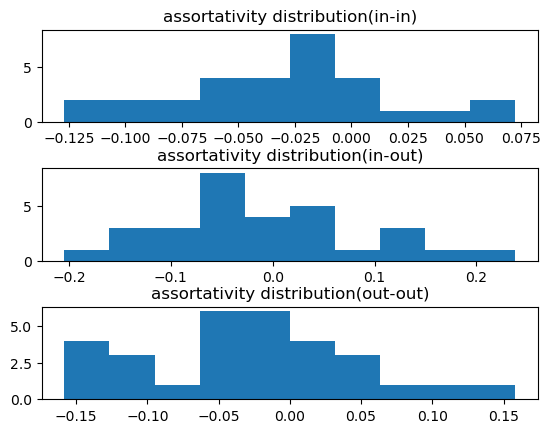

In [11]:
fit_DE(g3)


solution error = 1.790358972186823e-09
original strength assortativity(In-In) = -0.18275935827601467
average assortativity(In-In)= -0.04435573945817277
standard error(In-In) = 0.06645200654583568
original strength assortativity(In-Out) = -0.1500262619015027
average assortativity(In-Out)= 0.0018080843006392665
standard error(In-Out) = 0.06700214558788764
original strength assortativity(Out-Out) = -0.22162198464108931
average assortativity(Out-Out)= -0.03758866274829687
standard error(Out-Out) = 0.072300135369112


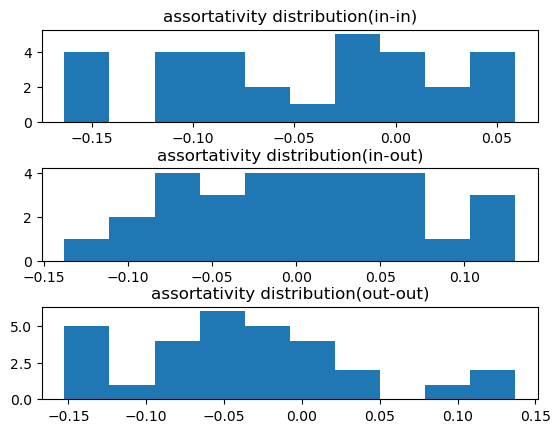

In [12]:
fit_DE(g4)


solution error = 1.8793899769775635e-10
original strength assortativity(In-In) = -0.18210688824545587
average assortativity(In-In)= -0.036190497165970045
standard error(In-In) = 0.05951123531931931
original strength assortativity(In-Out) = -0.15097267787220597
average assortativity(In-Out)= -0.021908559267549754
standard error(In-Out) = 0.07777997405252202
original strength assortativity(Out-Out) = -0.216663566619131
average assortativity(Out-Out)= -0.032259565600603744
standard error(Out-Out) = 0.06483334745227537


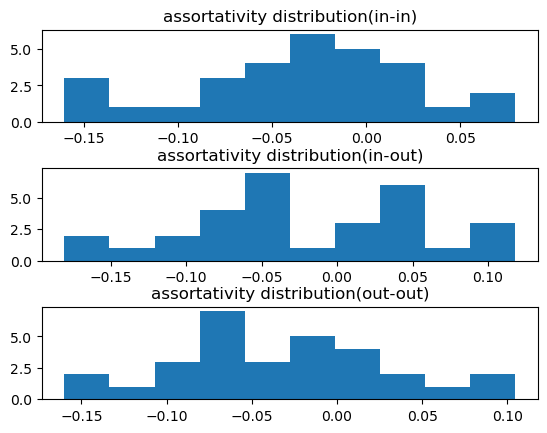

In [13]:
fit_DE(g5)


solution error = 1.904583086798084e-07
original strength assortativity(In-In) = -0.1814018437456629
average assortativity(In-In)= -0.021061585859007182
standard error(In-In) = 0.054681658851219464
original strength assortativity(In-Out) = -0.14633402643130197
average assortativity(In-Out)= -0.0007288821913075893
standard error(In-Out) = 0.0656777236291639
original strength assortativity(Out-Out) = -0.21503240776383775
average assortativity(Out-Out)= -0.01940353806607468
standard error(Out-Out) = 0.06885408308426509


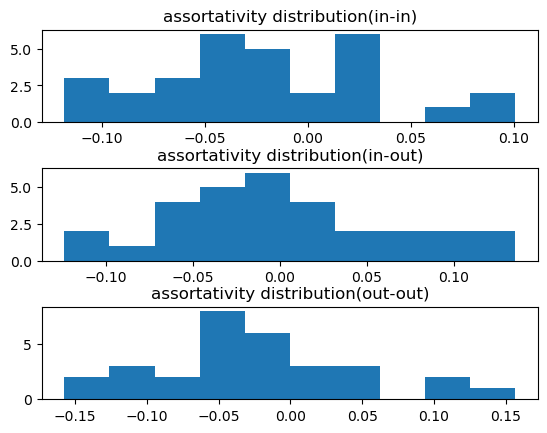

In [14]:
fit_DE(g6)


solution error = 6.622258297284134e-12
original strength assortativity(In-In) = -0.1738276188347705
average assortativity(In-In)= -0.03464434421640995
standard error(In-In) = 0.06218805953660023
original strength assortativity(In-Out) = -0.14002495813570312
average assortativity(In-Out)= -0.017747982696998454
standard error(In-Out) = 0.05996923370529707
original strength assortativity(Out-Out) = -0.2050439033349605
average assortativity(Out-Out)= -0.02943244663709259
standard error(Out-Out) = 0.07001390669245802


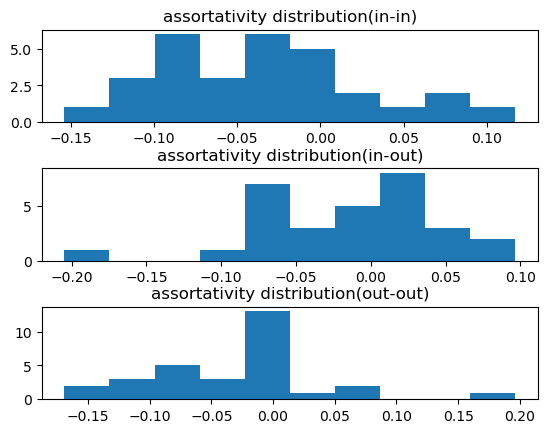

In [15]:
fit_DE(g7)


solution error = 7.879051544534832e-08
original strength assortativity(In-In) = -0.18302664318771755
average assortativity(In-In)= -0.04751802920219374
standard error(In-In) = 0.050509135397067376
original strength assortativity(In-Out) = -0.15060569350610475
average assortativity(In-Out)= -0.017932701189933266
standard error(In-Out) = 0.05120140346892036
original strength assortativity(Out-Out) = -0.21811432557950927
average assortativity(Out-Out)= -0.011344185179698025
standard error(Out-Out) = 0.08265513144028334


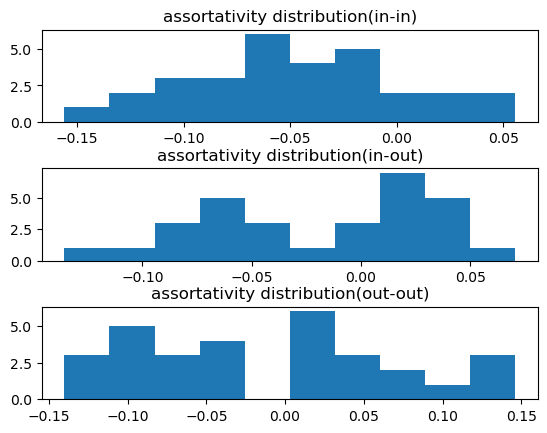

In [16]:
fit_DE(g8)


solution error = 1.2477385212150693e-05
original strength assortativity(In-In) = -0.17160878313149466
average assortativity(In-In)= -0.0446139383309529
standard error(In-In) = 0.07082194825153636
original strength assortativity(In-Out) = -0.13904809898512666
average assortativity(In-Out)= -0.029903832339296246
standard error(In-Out) = 0.07174853048125315
original strength assortativity(Out-Out) = -0.21057912387924155
average assortativity(Out-Out)= -0.03591534463590705
standard error(Out-Out) = 0.061585283141744086


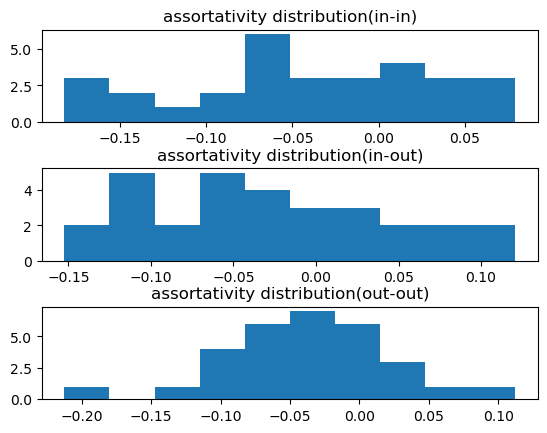

In [17]:
fit_DE(g9)


solution error = 2.213482730439864e-10
original strength assortativity(In-In) = -0.1762386744403051
average assortativity(In-In)= -0.05806696596008824
standard error(In-In) = 0.0604134958350054
original strength assortativity(In-Out) = -0.14153890612707679
average assortativity(In-Out)= -0.024429009341416588
standard error(In-Out) = 0.0592479478634048
original strength assortativity(Out-Out) = -0.20434526193894584
average assortativity(Out-Out)= -0.045162786223184787
standard error(Out-Out) = 0.06329041206153513


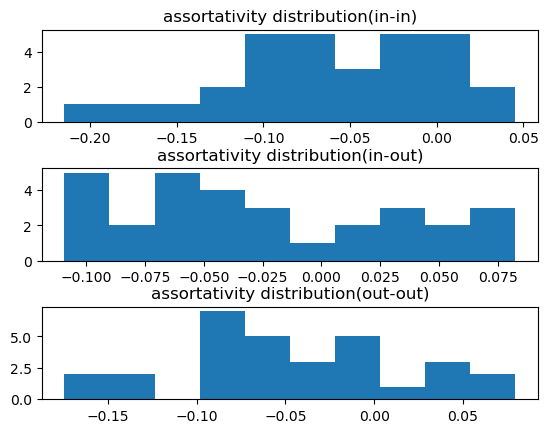

In [18]:
fit_DE(g10)


solution error = 5.920988144225703e-10
original strength assortativity(In-In) = -0.17094407642503592
average assortativity(In-In)= -0.022192176958904644
standard error(In-In) = 0.07636195069790998
original strength assortativity(In-Out) = -0.13154845079065297
average assortativity(In-Out)= -0.02232155984323916
standard error(In-Out) = 0.059206391651606696
original strength assortativity(Out-Out) = -0.19736231195991602
average assortativity(Out-Out)= -0.02557928678076208
standard error(Out-Out) = 0.06708383545978067


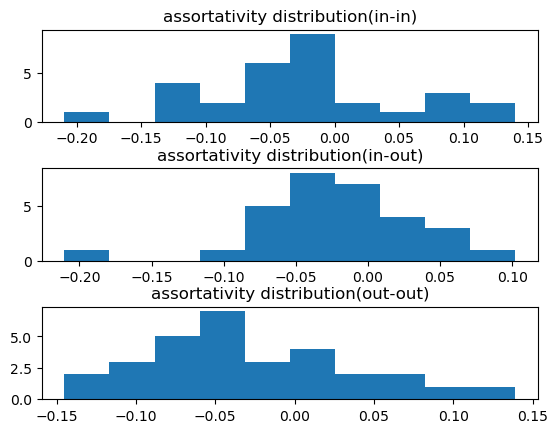

In [19]:
fit_DE(g11)

In [20]:
x = [1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002]
stdlistDEII2 = []
for i in stdlistDEII:
    stdlistDEII2.append(i*2)

In [21]:
stdlistDEIO2 = []
for i in stdlistDEIO:
    stdlistDEIO2.append(i*2)

In [22]:
stdlistDEOO2 = []
for i in stdlistDEOO:
    stdlistDEOO2.append(i*2)

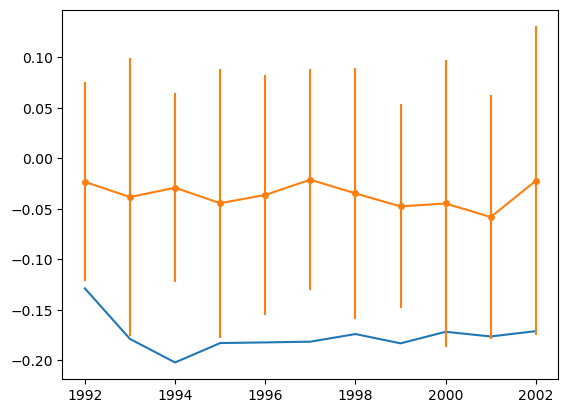

In [23]:
fig,ax = plt.subplots()
ax.plot(x,assolistDEinin)
ax.errorbar(x, meanlistDEII, yerr=stdlistDEII2, fmt='-o', markersize = 4)

plt.show()

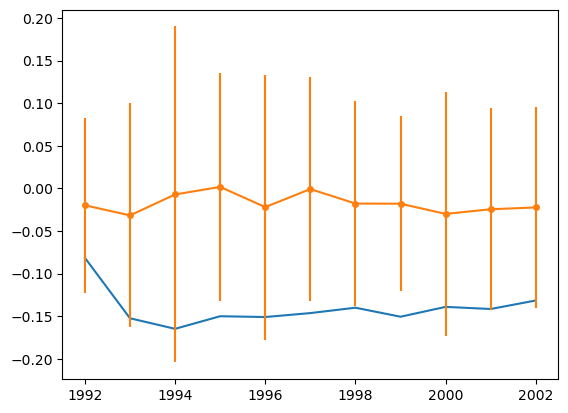

In [24]:
fig,ax = plt.subplots()
ax.plot(x,assolistDEinout)
ax.errorbar(x, meanlistDEIO, yerr=stdlistDEIO2, fmt='-o', markersize = 4)
plt.show()

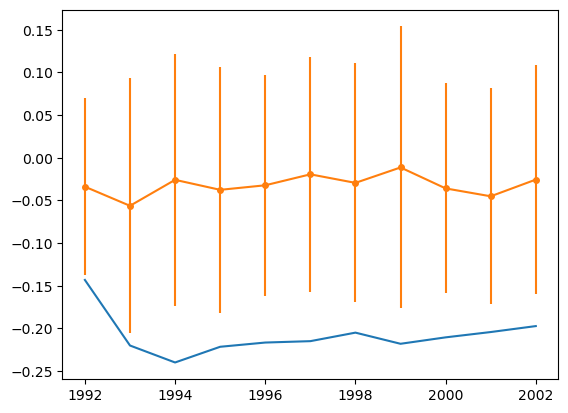

In [25]:
fig,ax = plt.subplots()
ax.plot(x,assolistDEoutout)
ax.errorbar(x, meanlistDEOO, yerr=stdlistDEOO2, fmt='-o', markersize = 4)
plt.show()

# A06.3 - Drawing conclusions

The clusterings in the original data are all around 0.80 from 1992-2022. But the reciprocity coefficients is showing an increasing trend, which means the network is gradually becoming a bidirectional network with the time.

In the original data, all the strength assortativities are negative. And negative values means that large-degree nodes tend to attach to low-degree nodes.

From the UBCM and DECM models, we can see that there are lots of differences between the random models and the original graph. The mean value is far away from the average value of original graph, also the confidence interval can hardly touch the original data. 

But from DBCM, we can notice that both the clustering and reciprocity are well fitted with the original data. They follow the same trend and almost the same value. So, the best way to estimate this graph is using DBCM.